In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#funcion conv para pasar tiempo de redshift a Gyr
import numpy as np

def conv(z, h, omega_lambda, omega_matter):

    H0=100*h
#conversion Mpc --> km
    conv1=1./(1e6*206265*1.496e8)
#conversion de s --> Gyr
    conv2=3600*24*365.25*1e9
    H0=H0*conv1*conv2

    c1=np.sqrt(omega_lambda*(1.+z)**(-3.))+np.sqrt((omega_lambda*(1.+z)**(-3.))+omega_matter)
    ln=np.log(c1/np.sqrt(omega_matter))
    c2=2./(3.*np.sqrt(omega_lambda))
        
    time = (1./H0)*c2*ln

    return time

In [6]:
### test
a0=1
h=0.732
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
a = frange(0,1,0.001)
z = (a0/a)-1
t = conv(z, h, omega_lambda, omega_matter)
for i in range(1,len(a)-1):
    print t[i], a[i]

/home/ornela/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide


0.00057685473216 0.001
0.00163159156576 0.002
0.00299742507504 0.003
0.00461483771171 0.004
0.00644943157083 0.005
0.00847799758433 0.006
0.0106834973179 0.007
0.0130527292321 0.008
0.0155750720909 0.009
0.0182417392019 0.01
0.0210453037411 0.011
0.0239793801766 0.012
0.0270384013682 0.013
0.0302174572729 0.014
0.0335121749466 0.015
0.0369186271591 0.016
0.0404332614065 0.017
0.0440528438102 0.018
0.0477744141166 0.019
0.0515952491201 0.02
0.0555128325861 0.021
0.0595248302583 0.022
0.0636290688967 0.023
0.0678235185465 0.024
0.0721062774247 0.025
0.076475558947 0.026
0.0809296805208 0.027
0.0854670538061 0.028
0.0900861762063 0.029
0.0947856233964 0.03
0.0995640427301 0.031
0.104420147399 0.032
0.109352711236 0.033
0.114360564073 0.034
0.119442587582 0.035
0.124597711536 0.036
0.129824910434 0.037
0.135123200446 0.038
0.140491636648 0.039
0.1459293105 0.04
0.151435347549 0.041
0.157008905329 0.042
0.162649171438 0.043
0.16835536177 0.044
0.174126718889 0.045
0.179962510536 0.046
0.185

In [3]:
#Guardamos los tiempos en un archivo
import matplotlib.pyplot as plt
import h5py

a0=1
h=0.732
omega_lambda=0.716
omega_matter=0.1277/(h**2.)

#fo=open('/home/ornela/python/tiempos.dat','w')
snapshot=range(497, -1,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    a = snap['subhalo_000/Time'].value
    z = (a0/a)-1
    t = conv(z, h, omega_lambda, omega_matter)
    
    #fo.write(str('%03d'%isnap)+'\t'+
    #        str('%12.6f'% a)+'\t'+
    #        str('%12.6f'% z)+'\t'+
    #        str('%12.6f'% t)+'\n')
    #fo.flush()

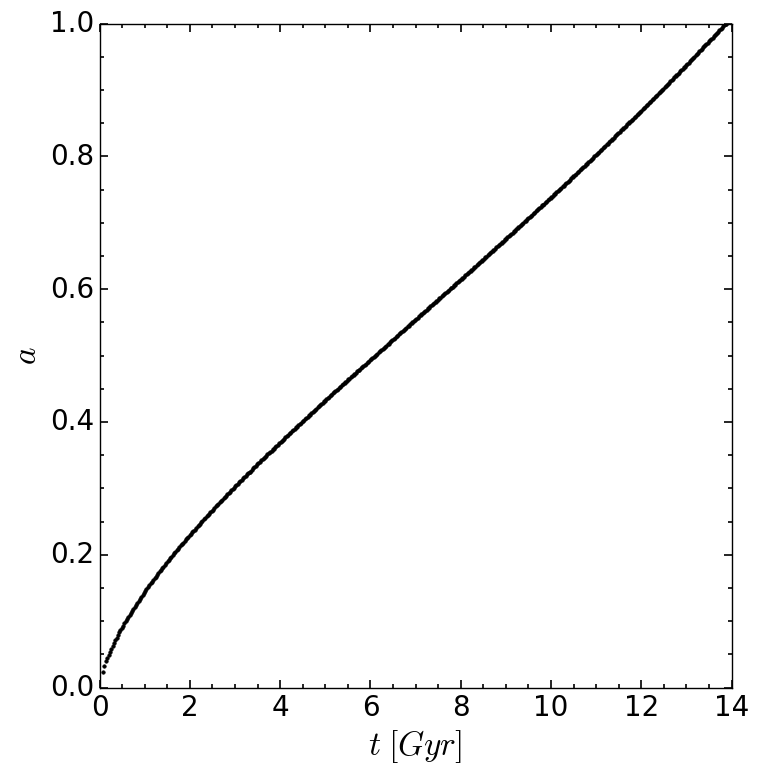

In [5]:
#Guardamos los tiempos en un archivo
import matplotlib.pyplot as plt
import h5py

a0=1
h=0.732
omega_lambda=0.716
omega_matter=0.1277/(h**2.)

aa =[]
tt =[]
snapshot=range(497, -1,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    a = snap['subhalo_000/Time'].value
    z = (a0/a)-1
    t = conv(z, h, omega_lambda, omega_matter)
    
    aa.append(a)
    tt.append(t)
    
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(tt,aa,'.', markersize=5, color = 'k')
#ax.set_ylim(-1000,1000)
#ax.set_xlim(-0.7,0)
#ax.set_title('Nueva simulacion - Dark Matter (Primeros 10 halos)', fontsize=22)
ax.set_xlabel(u'$t\;[Gyr]$', fontsize=24)
ax.set_ylabel(u'$a$', fontsize=24)
ax.minorticks_on()
ax.tick_params( labelsize=20)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')
plt.show()

In [11]:
#Guardamos los tiempos en un archivo
import matplotlib.pyplot as plt
import h5py
import time_conversion as time

a0=1
h=0.732
omega_lambda=0.716
omega_matter=0.1277/(h**2.)

fo=open('/home/ornela/python/int_tiempo.dat','w')

snap = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
a = snap[:,2]
snapshot=range(495, -1,-1)
for isnap in snapshot:
    isnap1 = isnap + 1
    
#snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
#snap1 = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap1)+'.h5py', 'r')

#a = snap['subhalo_000/Time'].value
    z = (a0/a[isnap])-1
    t = time.conv(z, h, omega_lambda, omega_matter)

#a1 = snap1['subhalo_000/Time'].value
    z1 = (a0/a[isnap1])-1
    t1 = time.conv(z1, h, omega_lambda, omega_matter)

    dif = str('%03d'%isnap1)+'-'+str('%03d'%isnap)
    delta = t1-t

    print dif, delta
    
    fo.write(str('%s'%isnap)+'\t'+
             str('%12.6f'% delta)+'\n')
    fo.flush()

496-495 0.0259959469633
495-494 0.0260268347055
494-493 0.0274300542048
493-492 0.0260902839707
492-491 0.0261212175608
491-490 0.0261521651478
490-489 0.0275620433862
489-488 0.0262157308051
488-487 0.0262467179026
487-486 0.0262777168663
486-485 0.0263087271532
485-484 0.0277269102563
484-483 0.0263724129877
483-482 0.0264034544092
482-481 0.0264345048821
481-480 0.0264655638277
480-479 0.0251012965118
479-478 0.026526069134
478-477 0.0265571496165
477-476 0.0265882362166
476-475 0.0266193283194
475-474 0.0266504253023
474-473 0.0266815265353
473-472 0.0267126313804
472-471 0.0267437391923
471-470 0.0267748493175
470-469 0.0268059610949
469-468 0.0254238206116
468-467 0.026866549395
467-466 0.025481220042
466-465 0.026927136387
465-464 0.026958246447
464-463 0.0255680862878
463-462 0.0270188216327
462-461 0.0270499225272
461-460 0.0256549269191
460-459 0.0271104737058
459-458 0.0271415590615
458-457 0.02574172414
457-456 0.0272020736094
456-455 0.025799039556
455-454 0.0272625568194


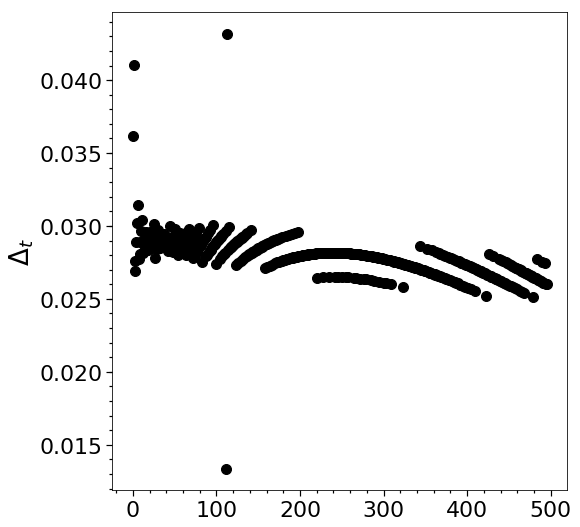

In [13]:
cm = np.loadtxt('/home/ornela/python/int_tiempo.dat')

delta = cm[:,1]
x = range(len(delta)-1,-1,-1)

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax3=fig.add_subplot(111)
ax3.plot(x,delta,'o', markersize =10, color='k')
#ax3.set_xlim(0,50)
#ax3.set_ylim(0.04,0.45)
ax3.minorticks_on()
ax3.tick_params( labelsize=22)
ax3.tick_params('both', length=3, width=1.2,which='minor')
ax3.tick_params('both', length=6, width=1.2,which='major')  
#plt.xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)
plt.ylabel(r'$\Delta_{t}$',fontsize=26)


plt.show()


#plot(x, delta, 'o')